 # Visualizing Rolling Statistics with Pandas DataFrames

In this exercise you will learn how to calculate and visualize rolling statistics pertaining to a specified time window. You will calculate a volume weighted average price for each window. The volume weighted average price is defined as:

average_daily_price = (open + close + high + low) / 4

The `average_volume` will be calculated for each window and the `average_price` will be calculated for each day.


 ## 1. Import Libraries and Dependencies
   - Import the `pandas` and `pathlib` libraries, and set the `%matplotlib inline` property.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline


 ## 2. Create a Path to the File Using Pathlib.
   - Create a variable, `aapl_csvpath`, that represents the path to the [AAPL.csv](../Resources/AAPL.csv) using the Pathlib library.

In [2]:
# Read the aapl data, set the `date` as the index
aapl_csv_path = Path("../Resources/aapl.csv")


 ## 3. Read the CSV into a Pandas DataFrame.
   - Read the CSV into a DataFrame while both formatting and setting the `date` column as the index.

In [3]:
# Read the aapl CSV into a DataFrame while formatting and setting the `date` column as the index
aapl_df = pd.read_csv(
    aapl_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True
)
aapl_df.head()


,close,volume,open,high,low
date,,,,,
2009-08-03,23.7757,98285279,23.6014,23.8057,23.5529
2009-08-04,23.6500,98772690,23.5614,23.6529,23.4586
2009-08-05,23.5871,105581942,23.6786,23.9128,23.4586
2009-08-06,23.4157,85271156,23.6543,23.7871,23.2986
2009-08-07,23.6443,96727219,23.6414,23.8000,23.5429


## 4. Calculate the average daily price

  - The average daily price is defined as:
     - average_daily_price = (open + close + high + low) / 4


In [4]:
# Calculate daily average
aapl_df['avg_price'] = aapl_df[['open','close','high','low']].mean(axis=1)
aapl_df.head()

,close,volume,open,high,low,avg_price
date,,,,,,
2009-08-03,23.7757,98285279,23.6014,23.8057,23.5529,23.683925
2009-08-04,23.6500,98772690,23.5614,23.6529,23.4586,23.580725
2009-08-05,23.5871,105581942,23.6786,23.9128,23.4586,23.659275
2009-08-06,23.4157,85271156,23.6543,23.7871,23.2986,23.538925
2009-08-07,23.6443,96727219,23.6414,23.8000,23.5429,23.657150


## 5. Define a method to use for calculating the volume weighted average price

  - average_price * volume / average_volume_for_window

  - The average price is for each day.

  - The average volume is for each window.


In [5]:
# Function for calculating volume weighted average price
def volume_weighted_average_price(avg_price,volume,avg_volume):
    return avg_price*volume/avg_volume
    

## 6. Calculate the average volume for each window using the `rolling` method with a window size of `10`.

In [6]:
# Calculate average volume for each window
aapl_df['avg_volume'] = aapl_df['volume'].rolling(window=10).mean()

# Drop n/a values for first points where the window was undefined
aapl_df.dropna(inplace=True)
aapl_df.head()

,close,volume,open,high,low,avg_price,avg_volume
date,,,,,,,
2009-08-14,23.8257,76389693,23.9914,24.0324,23.6471,23.874150,94566465.5
2009-08-17,22.7986,130749329,23.3643,23.3700,22.7743,23.076800,97812870.5
2009-08-18,23.4286,106128642,23.0900,23.4629,23.0586,23.260025,98548465.7
2009-08-19,23.5143,103001321,23.2500,23.6143,23.2071,23.396425,98290403.6
2009-08-20,23.7614,85380706,23.5686,23.8171,23.5157,23.665700,98301358.6


## 7. Apply the volume weighted average price function

  - Use the function defined previously to calculate the weighted price
  - Use a `lambda` function to pass in parameters from the other row values in the dataframe.
    - You can read more about the `lambda` function on the [documentation page](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
  - Use axis = 1 so that the `apply` method applies the function to each row.
    - You can read more about the `apply` method on the [documentation page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)


In [7]:
# Apply the volume weighted average price function for each row in the dataframe
aapl_df['avg_price_vol'] = aapl_df.apply(lambda x : volume_weighted_average_price(x.avg_price,x.volume,x.avg_volume), axis=1)


## 8. Plot the volume weighted average price and the average price
  - **Hint:** Plot the volume weighted average price first and then add the average price as the second figure.

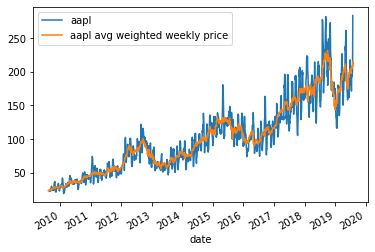

In [8]:
# Initialize plot with average weighted price
ax = aapl_df['avg_price_vol'].rolling(window=10).mean().plot()

# Add average price to the plot
aapl_df['avg_price'].plot(ax=ax)

# Set the legend of the figure
ax.legend(["aapl", "aapl avg weighted weekly price"])
